In [41]:
# Import Key Modules
from transformers import BertTokenizer, GPT2TokenizerFast
import tiktoken
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import string
from urllib.parse import urlparse, urlunparse, quote, unquote, parse_qs, urlencode
from collections import Counter

In [23]:
from huggingface_hub import notebook_login

notebook_login()

In [42]:
gpt_tokenizer = tiktoken.get_encoding("o200k_harmony")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
claude_tokenizer = GPT2TokenizerFast.from_pretrained("Xenova/claude-tokenizer")

In [9]:
# Count the frequncy of a number in an array
nums = np.array([ 1,1,3,2,2,2,9,9,9,-1,-1,-1,-1,-1 ])

num_freq = Counter(nums)

for k, v in num_freq.items():
   print(f'Number {k:2} occurs {v} times')

Number  1 occurs 2 times
Number  3 occurs 1 times
Number  2 occurs 3 times
Number  9 occurs 3 times
Number -1 occurs 5 times


In [20]:
text = "Hello, my name is Anirban Guha and I am a fan of Tintin and Captain Haddock"


char_freq = Counter(list(text))

char_freq_sorted = sorted(char_freq.items(), key=lambda ch: ch[1], reverse=True)

for k, v in char_freq_sorted:
   print(f'Character "{k:2}" occurs {v} times')


Character "  " occurs 15 times
Character "a " occurs 11 times
Character "n " occurs 9 times
Character "i " occurs 5 times
Character "d " occurs 4 times
Character "o " occurs 3 times
Character "m " occurs 3 times
Character "H " occurs 2 times
Character "e " occurs 2 times
Character "l " occurs 2 times
Character "f " occurs 2 times
Character "t " occurs 2 times
Character ", " occurs 1 times
Character "y " occurs 1 times
Character "s " occurs 1 times
Character "A " occurs 1 times
Character "r " occurs 1 times
Character "b " occurs 1 times
Character "G " occurs 1 times
Character "u " occurs 1 times
Character "h " occurs 1 times
Character "I " occurs 1 times
Character "T " occurs 1 times
Character "C " occurs 1 times
Character "p " occurs 1 times
Character "c " occurs 1 times
Character "k " occurs 1 times


# Zipf's Law: Frequency of characters in a pack of books

In [21]:
# all books have the same url format;
# they are unique by numerical code
baseurl = 'https://www.gutenberg.org/cache/epub/'

bookurls = [
    # code       title
    ['84',    'Frankenstein'    ],
    ['64317', 'GreatGatsby'     ],
    ['11',    'AliceWonderland' ],
    ['1513',  'RomeoJuliet'     ],
    ['76',    'HuckFinn'        ],
    ['219',   'HeartDarkness'   ],
    ['2591',  'GrimmsTales'     ],
    ['2148',  'EdgarAllenPoe'   ],
    ['36',    'WarOfTheWorlds'  ],
    ['829',   'GulliversTravels']
]

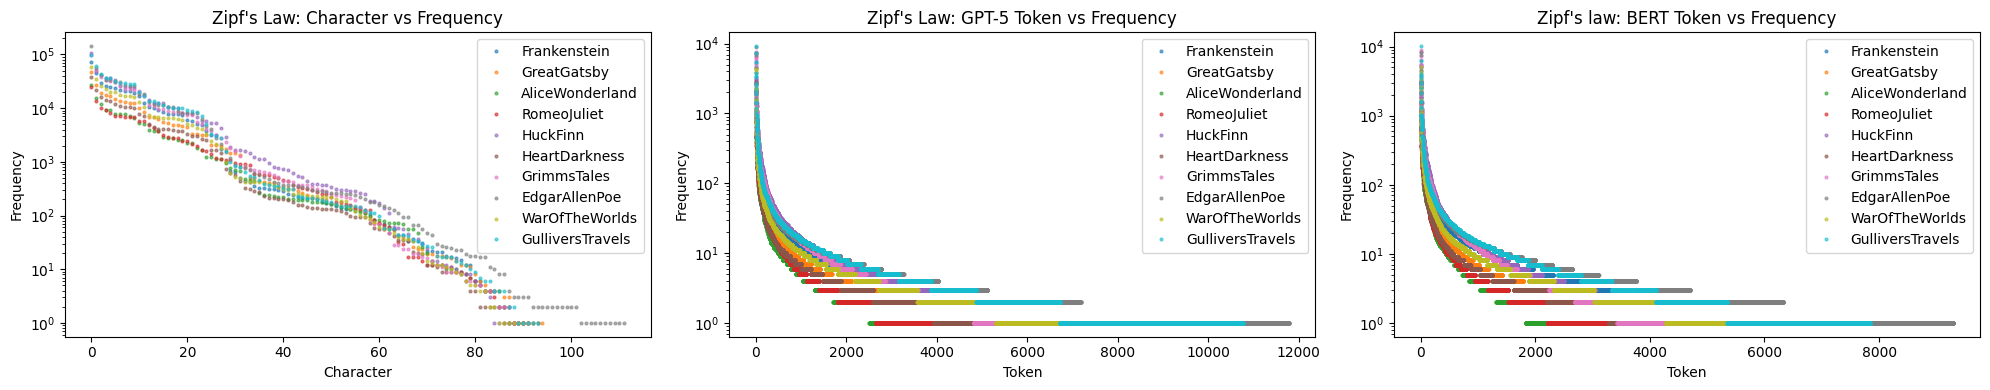

In [36]:
from collections import Counter

fig, axs = plt.subplots(1, 3, figsize=(20, 4))

for code, title in bookurls:
    # 1) get the text
    fullurl = baseurl + code + '/pg' + code + '.txt'
    text = requests.get(fullurl).text

    # 2) Zipf's law for characters (O(n))
    char_counts = Counter(text)
    char_freqs = np.sort(list(char_counts.values()))[::-1]
    axs[0].plot(char_freqs, '.', markersize=4, alpha=0.6, label=title)

    axs[0].set_yscale('log')
    axs[0].set_xlabel('Character')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Zipf\'s Law: Character vs Frequency')

    # 3) Zipf's law for tokens (O(n))
    tokens = gpt_tokenizer.encode(text)
    token_counts = Counter(tokens)
    token_freqs = np.sort(list(token_counts.values()))[::-1]
    axs[1].plot(token_freqs, '.', markersize=4, alpha=0.6, label=title)

    axs[1].set_yscale('log')
    axs[1].set_xlabel('Token')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Zipf\'s Law: GPT-5 Token vs Frequency')

    # 4) BERT tokens (O(n))

    tokens = bert_tokenizer.encode(text)
    token_counts = Counter(tokens)
    token_freqs = np.sort(list(token_counts.values()))[::-1]
    axs[2].plot(token_freqs, '.', markersize=4, alpha=0.6, label=title)

    axs[2].set_yscale('log')
    axs[2].set_xlabel('Token')
    axs[2].set_ylabel('Frequency')
    axs[2].set_title('Zipf\'s law: BERT Token vs Frequency')



# Only call legend once per axis (minor improvement)
axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()
plt.show()


# Explore Claude tokenizer

In [66]:
# Compare the vocabulary size

print(f"{'Vocabulary Size of Claude':<25} : {claude_tokenizer.vocab_size:>7,}")
print(f"{'Vocabulary Size of GPT-2':<25} : {gpt_tokenizer.n_vocab:>7,}")
print(f"{'Vocabulary Size of BERT':<25} : {bert_tokenizer.vocab_size:>7,}")

Vocabulary Size of Claude :  65,000
Vocabulary Size of GPT-2  : 201,088
Vocabulary Size of BERT   :  30,522


In [67]:
words = [
    ' hypothetical',
    ' hypothetical ',
    'hypothetical ',
    'hypothetical',
    'hipothetical'
]

for word in words:
  toks = claude_tokenizer.encode(word)
  print(f'"{word:20}" has {len(toks)} tokens {toks}:\n {[claude_tokenizer.decode(t) for t in toks]}')

" hypothetical       " has 1 tokens [44086]:
 [' hypothetical']
" hypothetical       " has 2 tokens [44086, 225]:
 [' hypothetical', ' ']
"hypothetical        " has 3 tokens [30678, 36881, 225]:
 ['hypot', 'hetical', ' ']
"hypothetical        " has 2 tokens [30678, 36881]:
 ['hypot', 'hetical']
"hipothetical        " has 3 tokens [3686, 331, 36881]:
 ['hip', 'ot', 'hetical']


In [68]:
words = [
    ' hypothetical',
    ' hypothetical ',
    'hypothetical ',
    'hypothetical',
    'hipothetical'
]

for word in words:
  toks = gpt_tokenizer.encode(word)
  print(f'"{word:20}" has {len(toks)} tokens: {toks}\n {[gpt_tokenizer.decode([t]) for t in toks]}')

" hypothetical       " has 1 tokens: [132395]
 [' hypothetical']
" hypothetical       " has 2 tokens: [132395, 220]
 [' hypothetical', ' ']
"hypothetical        " has 4 tokens: [152366, 346, 105451, 220]
 ['hyp', 'ot', 'hetical', ' ']
"hypothetical        " has 3 tokens: [152366, 346, 105451]
 ['hyp', 'ot', 'hetical']
"hipothetical        " has 3 tokens: [2504, 346, 105451]
 ['hip', 'ot', 'hetical']


In [69]:
words = [
    ' hypothetical',
    ' hypothetical ',
    'hypothetical ',
    'hypothetical',
    'hipothetical'
]

for word in words:
  toks = bert_tokenizer.encode(word)
  print(f'"{word:20}" has {len(toks)-2} tokens {toks}:\n {[bert_tokenizer.decode(t) for t in toks][1:-1]}')

" hypothetical       " has 1 tokens [101, 25613, 102]:
 ['hypothetical']
" hypothetical       " has 1 tokens [101, 25613, 102]:
 ['hypothetical']
"hypothetical        " has 1 tokens [101, 25613, 102]:
 ['hypothetical']
"hypothetical        " has 1 tokens [101, 25613, 102]:
 ['hypothetical']
"hipothetical        " has 4 tokens [101, 5099, 14573, 16530, 2389, 102]:
 ['hip', '##oth', '##etic', '##al']
